Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#data set is google project sunroof data at the state level. 
# Can be found here: https://www.kaggle.com/jboysen/google-project-sunroof. 
gps_state = pd.read_csv(r'google-project-sunroof/project-sunroof-state-09082017.csv', index_col='region_name')

In [3]:
gps_state.dtypes

state_name                               object
lat_max                                 float64
lat_min                                 float64
lng_max                                 float64
lng_min                                 float64
lat_avg                                 float64
lng_avg                                 float64
yearly_sunlight_kwh_kw_threshold_avg    float64
count_qualified                           int64
percent_covered                         float64
percent_qualified                       float64
number_of_panels_n                        int64
number_of_panels_s                        int64
number_of_panels_e                        int64
number_of_panels_w                        int64
number_of_panels_f                        int64
number_of_panels_median                   int64
number_of_panels_total                    int64
kw_median                               float64
kw_total                                float64
yearly_sunlight_kwh_n                   


## Choose one variable and plot that variable four different ways.

- Variable: yearly_sunlight_kwh_total
- Four charts:
    - Box plot
    - Histogram + KDE plot + rug plot
    - Violin plot
    - Bar plot

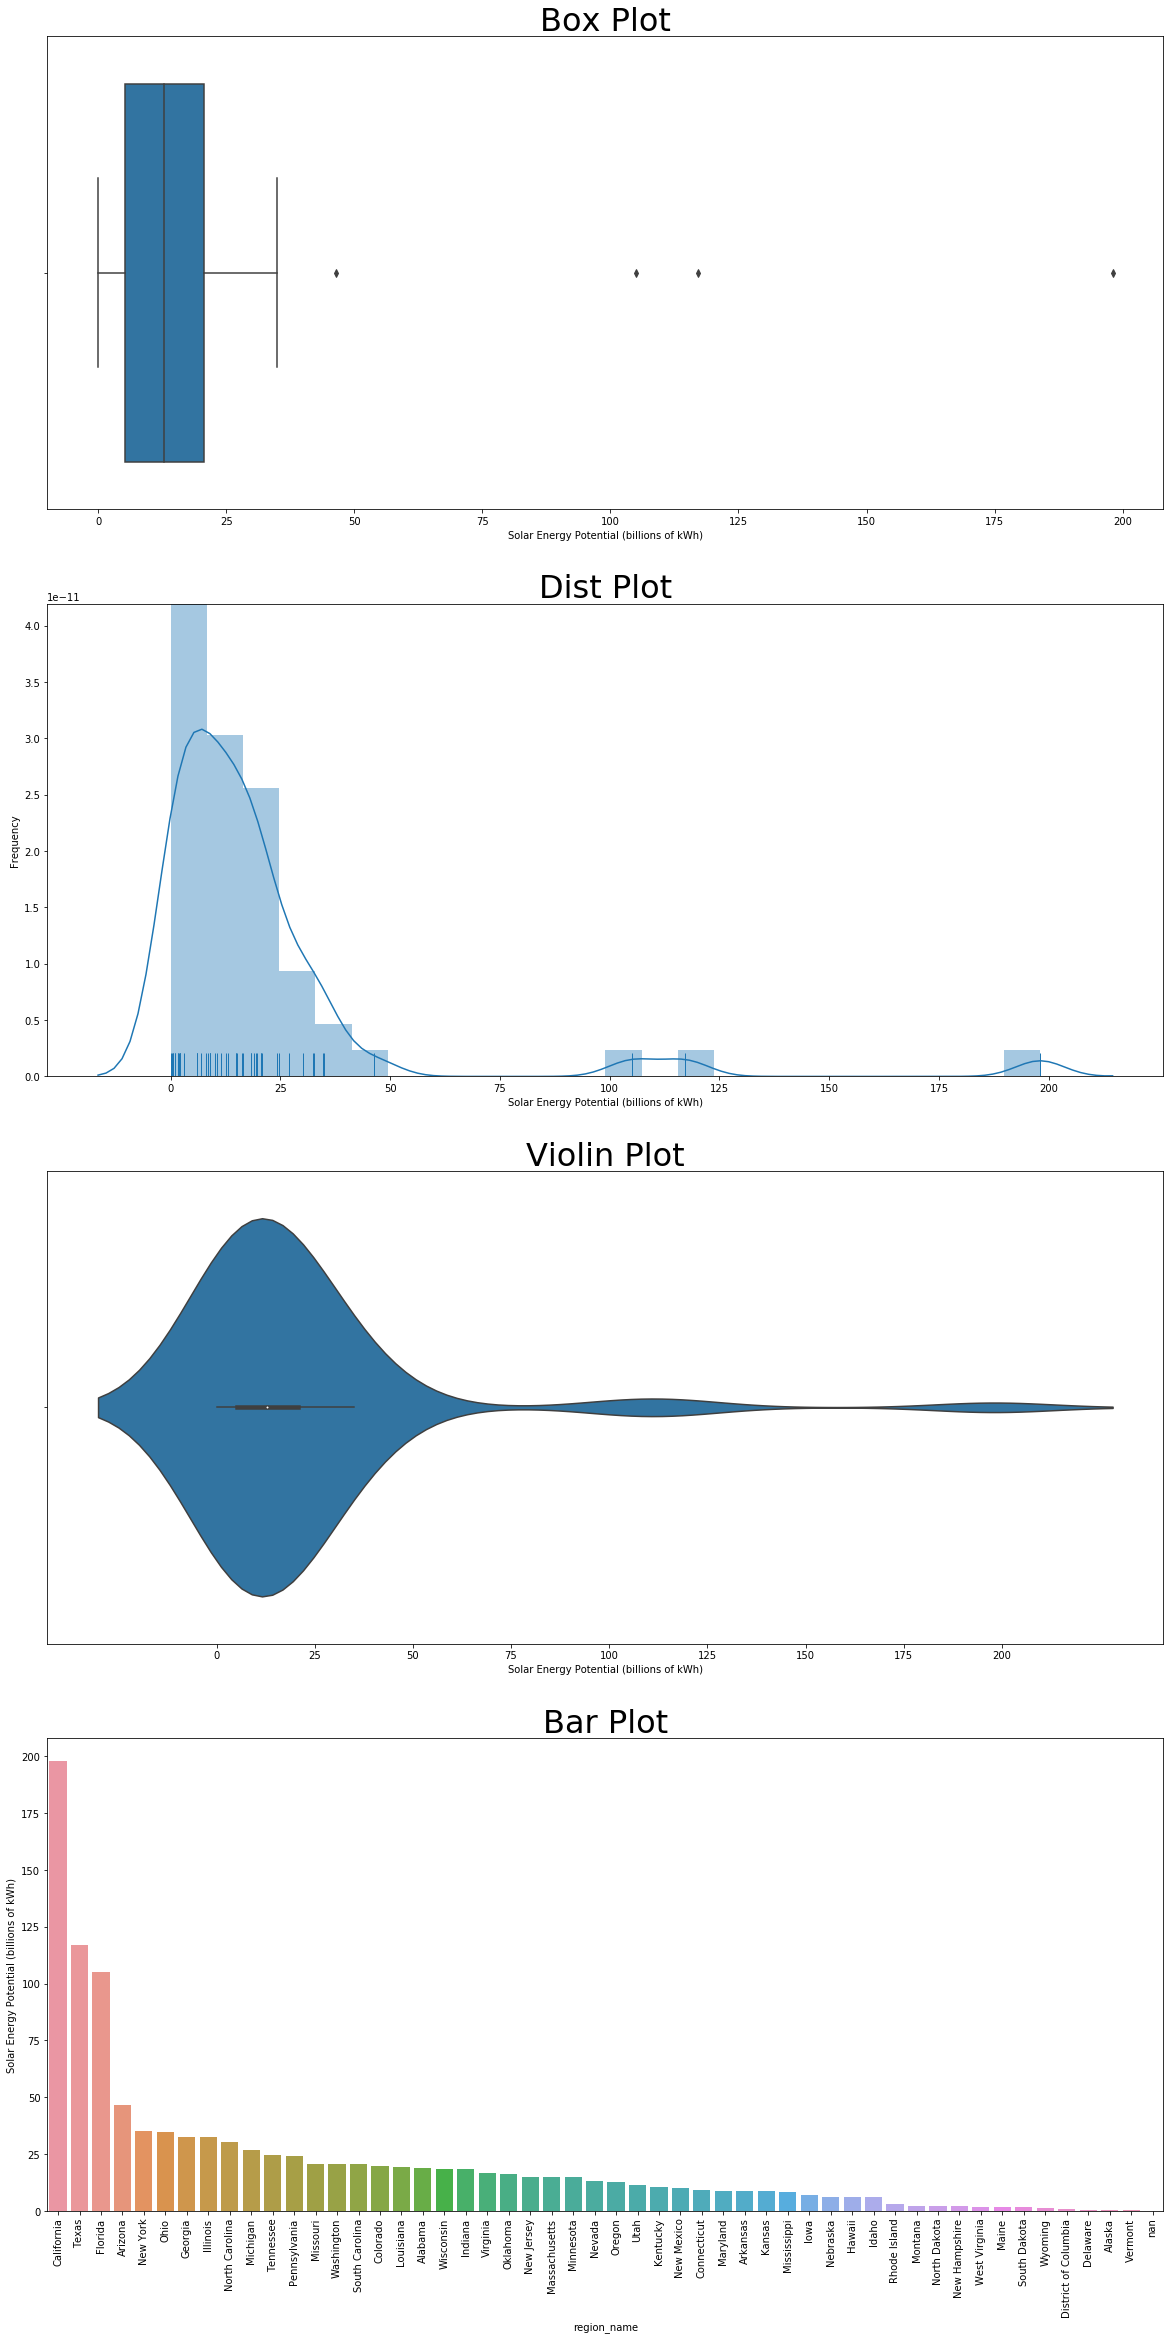

In [4]:
fig, axes = plt.subplots(4,1,figsize=(20,40))

p1 = sns.boxplot(x='yearly_sunlight_kwh_total',data=gps_state, ax=axes[0])
p1.set_xticks(range(0,200000000001,25000000000))
p1.set_xticklabels(range(0,201,25))
p1.set(xlabel='Solar Energy Potential (billions of kWh)', title='Box Plot')
p1.title.set(fontsize=32)

p2 = sns.distplot(gps_state['yearly_sunlight_kwh_total'], rug=True, ax=axes[1])
p2.set_xticks(range(0,200000000001,25000000000))
p2.set_xticklabels(range(0,201,25))
p2.set(xlabel='Solar Energy Potential (billions of kWh)', ylabel='Frequency', title='Dist Plot')
p2.title.set(fontsize=32)


p3 = sns.violinplot(gps_state['yearly_sunlight_kwh_total'], ax=axes[2])
p3.set_xticks(range(0,200000000001,25000000000))
p3.set_xticklabels(range(0,201,25))
p3.set(xlabel='Solar Energy Potential (billions of kWh)', title='Violin Plot')
p3.title.set(fontsize=32)


p4 = sns.barplot(x=gps_state.index, y='yearly_sunlight_kwh_total', data=gps_state, order=gps_state.sort_values(by='yearly_sunlight_kwh_total', ascending=False).index)
p4.set_xticklabels(p4.get_xticklabels(), rotation=90)
p4.set_yticks(range(0,200000000001,25000000000))
p4.set_yticklabels(range(0,201,25))
p4.set(ylabel='Solar Energy Potential (billions of kWh)', title='Bar Plot')
p4.title.set(fontsize=32)

plt.show()

## Choose two continuous variables, and plot them three different ways.

- Variables: kwh per panel vs avg lattitude (from capstone)
- 3 different charts:
    - Regression plot
    - Joint plot (Histogram + Scatter)
    - Two dimensional KDE plot 

In [5]:
#make kwh_per_panel column. Shows how many kwh a panel produces each year given assuming 1.650m x 0.992m panels
gps_state['kwh_per_panel'] = gps_state['yearly_sunlight_kwh_total']/gps_state['number_of_panels_total']

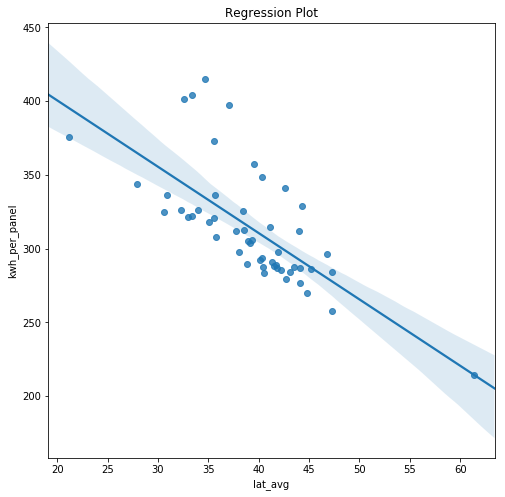

In [6]:
plt.figure(figsize=(8,8))
sns.regplot(x='lat_avg', y='kwh_per_panel',data=gps_state)
plt.title('Regression Plot')
plt.show()

Joint Plot


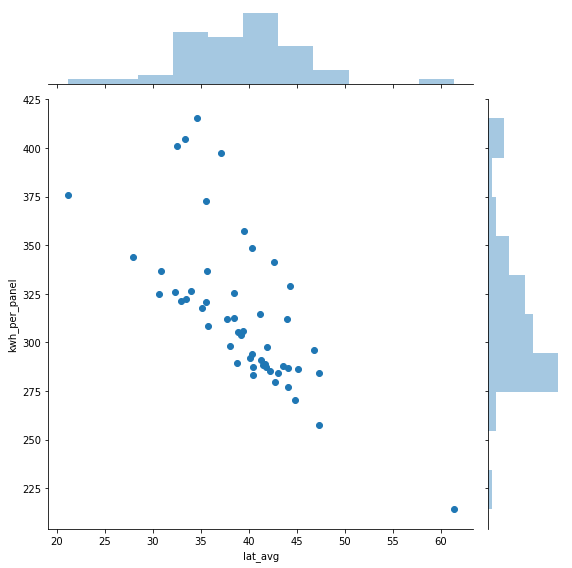

In [7]:
print('Joint Plot')
sns.jointplot(x='lat_avg', y='kwh_per_panel', data=gps_state, height = 8)
plt.show()

Two dimensional KDE Plot


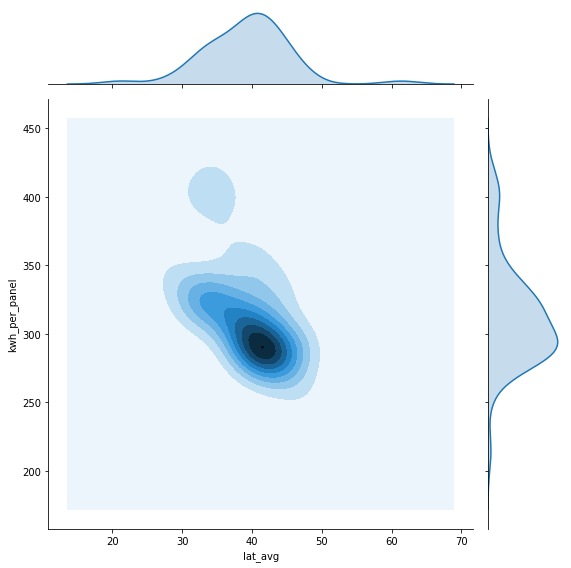

In [8]:
print('Two dimensional KDE Plot')
jp = sns.jointplot(x='lat_avg', y='kwh_per_panel', data=gps_state, height=8, kind='kde')

## Choose one continuous variable and one categorical variable, and plot them six different ways.

- Continuous variable: yearly_sunlight_kwh_total
- Categorical variable: Retion (Northern States vs Southern States
- 6 different charts:
    1. Box plot
    2. Bar plot
    3. Violin plot
    4. Point plot
    5. Overlapping kde plot
    6. Categorical scatter plot
    

In [9]:
# divide states up into northern or southern
lat_avg_median = np.median(gps_state['lat_avg'])
gps_state['Region'] = np.where(gps_state['lat_avg']>=lat_avg_median, 'North', 'South')

In [10]:
gps_state.Region.describe()

count        52
unique        2
top       North
freq         26
Name: Region, dtype: object

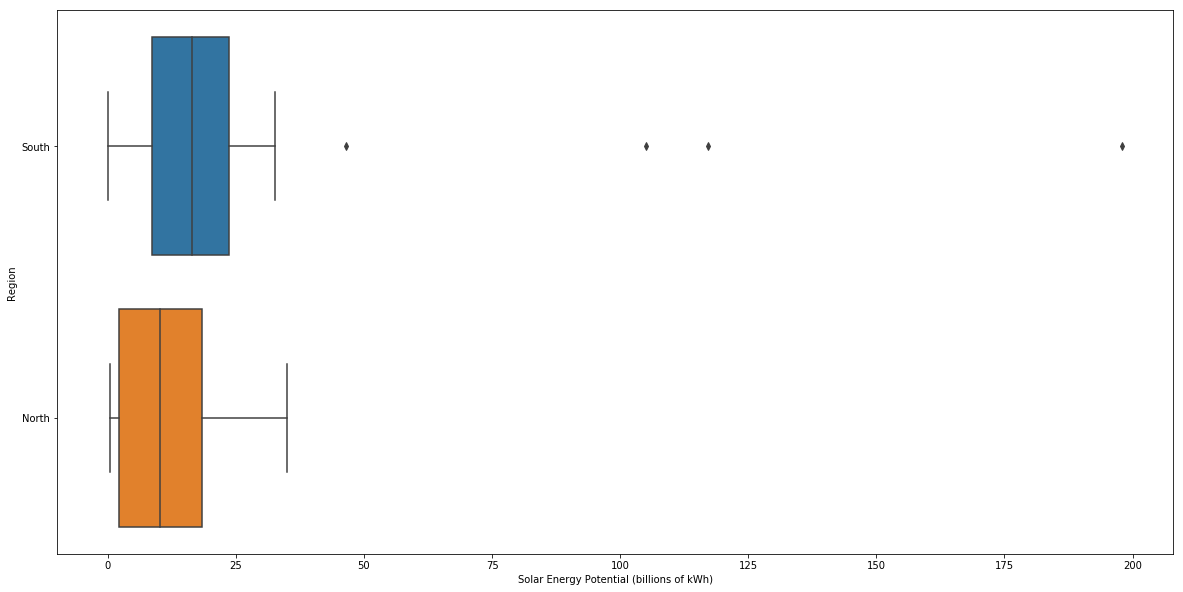

In [11]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y='Region',x='yearly_sunlight_kwh_total',data=gps_state)
ax.set_xticks(range(0,200000000001,25000000000))
ax.set_xticklabels(range(0,201,25))
ax.set(xlabel='Solar Energy Potential (billions of kWh)')
plt.show()

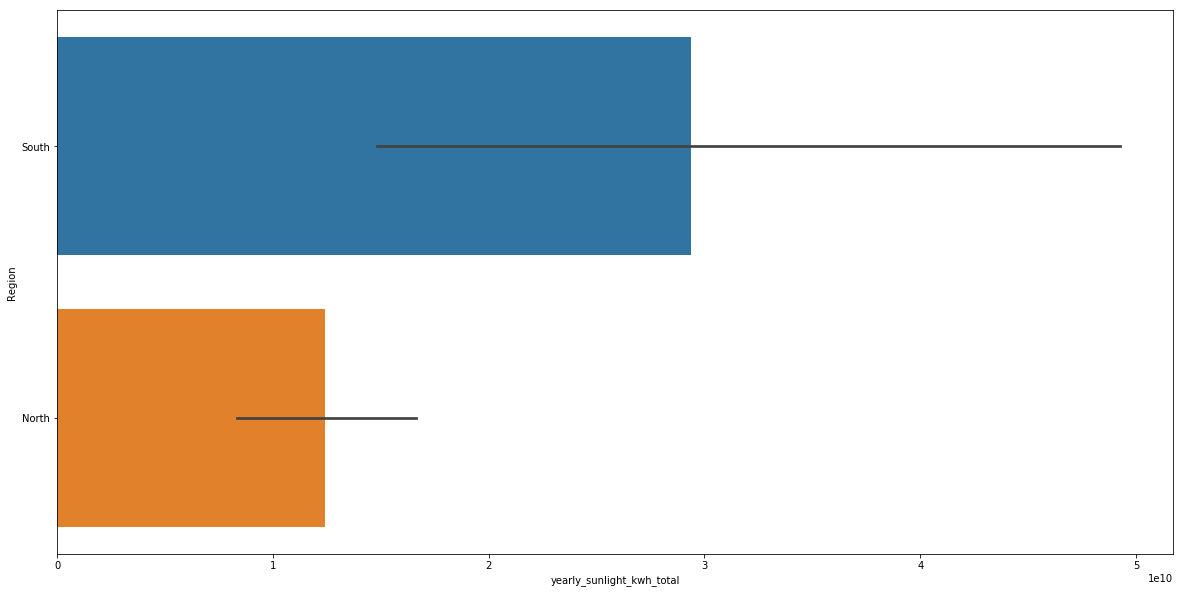

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(y='Region',x='yearly_sunlight_kwh_total',data=gps_state)
plt.show()

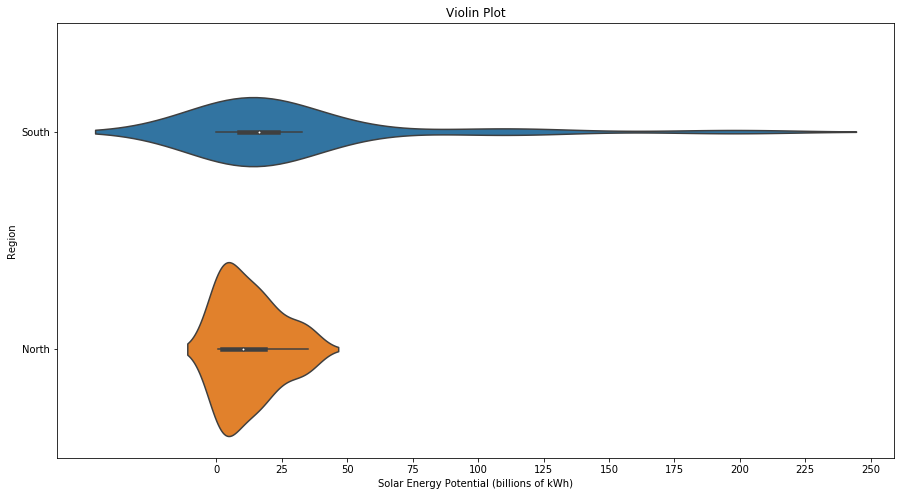

In [13]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(y='Region', x='yearly_sunlight_kwh_total', data=gps_state)
ax.set_xticks(range(0,250000000001,25000000000))
ax.set_xticklabels(range(0,251,25))
ax.set(xlabel='Solar Energy Potential (billions of kWh)')
plt.title('Violin Plot')
plt.show()

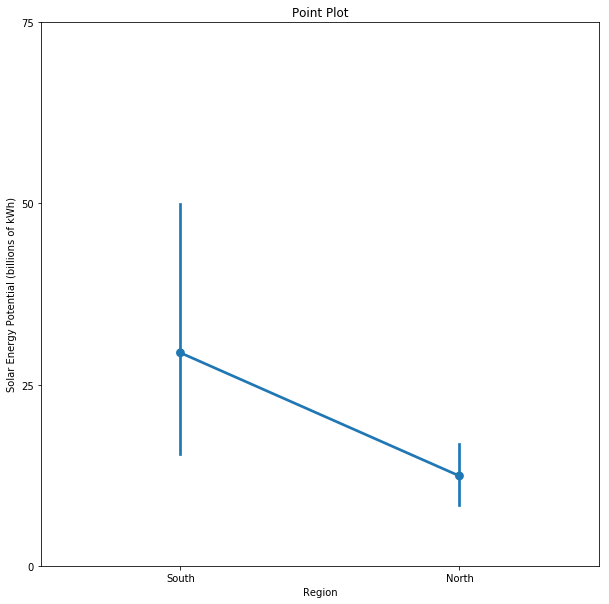

In [14]:
plt.figure(figsize=(10,10))
ax = sns.pointplot(x='Region',y='yearly_sunlight_kwh_total',data=gps_state)
ax.set_yticks(range(0,75000000001,25000000000))
ax.set_yticklabels(range(0,76,25))
ax.set(ylabel='Solar Energy Potential (billions of kWh)')
plt.title('Point Plot')
plt.show()

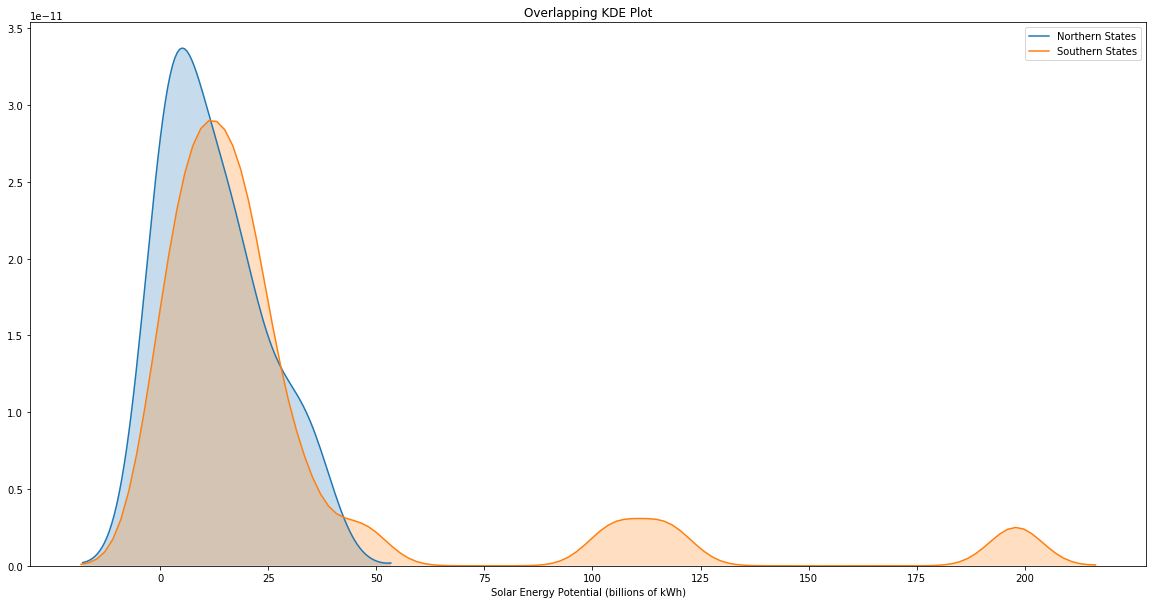

In [15]:
north = gps_state.loc[(gps_state['Region']=='North'), 'yearly_sunlight_kwh_total']
south = gps_state.loc[(gps_state['Region']=='South'), 'yearly_sunlight_kwh_total']

fig, ax = plt.subplots(figsize=(20,10))
sns.kdeplot(north, ax=ax, shade=True, legend='Northern States')
sns.kdeplot(south, ax=ax, shade=True)
ax.legend(['Northern States','Southern States'])
ax.set_xticks(range(0,200000000001,25000000000))
ax.set_xticklabels(range(0,201,25))
ax.set(xlabel='Solar Energy Potential (billions of kWh)')
plt.title('Overlapping KDE Plot')
plt.show()

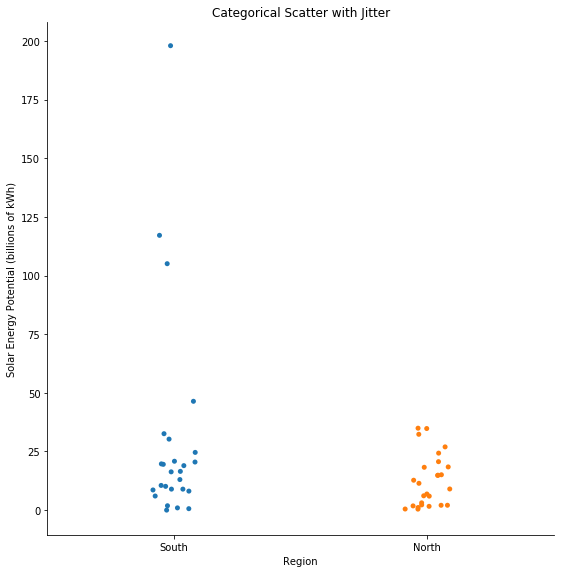

In [16]:
sns.catplot(x='Region', y='yearly_sunlight_kwh_total', data=gps_state, height=8)
plt.yticks(np.arange(0,200000000001,25000000000), np.arange(0,201,25))
plt.ylabel('Solar Energy Potential (billions of kWh)')
plt.title('Categorical Scatter with Jitter')
plt.show()